<a href="https://colab.research.google.com/github/glenda2912/Tous12/blob/main/04_%2C_DS_and_Pandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1. DS and Pandas**

It is the Excel of Python.

In [2]:
# Libraries

import numpy as np
import pandas as pd

# **2. Series**

A *Series* is a one dimensional object.

## 2.1. Series Creation

In [ ]:
# Empty Series

s_empty = pd.Series()
print(s_empty)

Series([], dtype: float64)


<ipython-input-2-99c40c9e7307>:3: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  s_empty = pd.Series()


In [ ]:
# Create a Series by typing values

s_int = pd.Series([1,2,3,4,5,6,7,8,9])
print(s_int)

s_str = pd.Series(['Nicolas', 'Luisa', 'José'])
print(s_str)

0    1
1    2
2    3
3    4
4    5
5    6
6    7
7    8
8    9
dtype: int64
0    Nicolas
1      Luisa
2       José
dtype: object


In [ ]:
# Create a Serie with random numbers

s_rand = pd.Series(np.random.rand(10))
print(s_rand)

0    0.321559
1    0.721000
2    0.019048
3    0.503365
4    0.506561
5    0.176075
6    0.235247
7    0.492280
8    0.134319
9    0.367786
dtype: float64


## 2.2. Indexing

In [ ]:
# Check the index of a Series

s_rand.index

RangeIndex(start=0, stop=10, step=1)

In [ ]:
# create your own index

new_index = ['A','B','C']
s_str3 = s_str.set_axis(new_index)
print(s_str3)

A    Nicolas
B      Luisa
C       José
dtype: object


## 2.3. Select and Slice

In [ ]:
# Simple Selection
s_str3['B']
s_str3[1]

'Luisa'

In [ ]:
# Select different elements
s_rand[[3,8]]

3    0.503365
8    0.134319
dtype: float64

In [ ]:
# Another way
s_rand[:3]

0    0.321559
1    0.721000
2    0.019048
dtype: float64

In [4]:
# Another way

pd.date_range(start = '01/01/2023', periods =32, freq = 'Q')

DatetimeIndex(['2023-03-31', '2023-06-30', '2023-09-30', '2023-12-31',
               '2024-03-31', '2024-06-30', '2024-09-30', '2024-12-31',
               '2025-03-31', '2025-06-30', '2025-09-30', '2025-12-31',
               '2026-03-31', '2026-06-30', '2026-09-30', '2026-12-31',
               '2027-03-31', '2027-06-30', '2027-09-30', '2027-12-31',
               '2028-03-31', '2028-06-30', '2028-09-30', '2028-12-31',
               '2029-03-31', '2029-06-30', '2029-09-30', '2029-12-31',
               '2030-03-31', '2030-06-30', '2030-09-30', '2030-12-31'],
              dtype='datetime64[ns]', freq='Q-DEC')

### 3.2.Aasing a time-serie index

In [5]:
# Create dates 

my_dates = pd.date_range(start = '01/03/2023', periods = 15)

# Create an object 

sales = pd.Series(np.random.randint(low = 200, high = 250, size = 15 ),
                  index = my_dates)
print(sales)

2023-01-03    208
2023-01-04    240
2023-01-05    239
2023-01-06    243
2023-01-07    201
2023-01-08    201
2023-01-09    208
2023-01-10    242
2023-01-11    232
2023-01-12    207
2023-01-13    249
2023-01-14    208
2023-01-15    218
2023-01-16    241
2023-01-17    223
Freq: D, dtype: int64


# **4. Practical case - Simulation**

## 4.2 Create the simulation 

A simulation of the price of a financial asset.

* Fist, create the dates:


In [18]:
## Create a daily series of dates from 2021 until today 

# Saves "today"
td = pd.to_datetime("today").strftime("%m/%d/%Y")

# Create the date range 

dr = pd.date_range(start = '01/01/2021', end = td)
nd = len(dr)

* Second, simulate the price 


In [20]:
# Price with returns ~ N(mu, sigma^2)

## Moments 
mu = 0.001; sigma = 0.01
## Returns
r = np.random.normal(mu, sigma, size = nd)

##Price
s   = np.empty(nd)
s[0] = 100

for i in range(1,nd):
  s[i] = s[i-1]*np.exp(r[1])

* Third, put together dates and prices 

In [29]:
# Create the time series 
s = pd.Series(s, index = dr)
s.head()

2021-01-01    100.000000
2021-01-02    100.113467
2021-01-03    100.227062
2021-01-04    100.340787
2021-01-05    100.454640
Freq: D, dtype: float64

In [30]:
import matplotlib.pyplot as plt

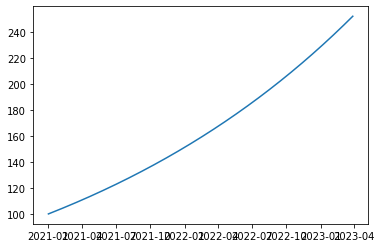

In [31]:
plt.plot(s)
plt.show()